In [42]:
from AuT.lib.dataset import FewShotSpeechCommand
BASE_PATH = '/root'

dataset = FewShotSpeechCommand(
    root_path=BASE_PATH + '/data/speech_commands',
    mode='test', include_rate=False, data_tfs=None
)
len(dataset)

6835

In [43]:
dataset = FewShotSpeechCommand(
    root_path=BASE_PATH + '/data/speech_commands',
    mode='test-fs', include_rate=False, data_tfs=None
)
len(dataset)

300

In [44]:
dataset = FewShotSpeechCommand(
    root_path=BASE_PATH + '/data/speech_commands',
    mode='test-res', include_rate=False, data_tfs=None
)
len(dataset)

6535

In [45]:
import torchaudio
import torch

wavform, label = dataset[0]
sr = 16000
wavform = wavform - wavform.mean()
fbank = torchaudio.compliance.kaldi.fbank(
    wavform, htk_compat=True, sample_frequency=sr, use_energy=False,
    window_type='hanning', num_mel_bins=128, dither=0.0, frame_shift=10
)
target_length = 100
p = target_length - fbank.shape[0]
if p > 0:
    m = torch.nn.ZeroPad2d((0, 0, 0, p))
    fbank = m(fbank)
elif p < 0:
    fbank = fbank[0:target_length, :]

fbank.shape

torch.Size([100, 128])

In [46]:
import torchaudio.transforms as a_transforms
from lib.scDataset import SpeechCommandsDataset
from lib.wavUtils import pad_trunc

# dataset = SpeechCommandsDataset(root_path=BASE_PATH + '/data/speech_commands', mode='train', include_rate=False, data_tfs=pad_trunc(max_ms=1000, sample_rate=sr))
wavform, label = dataset[0]
tsf = a_transforms.MelSpectrogram(sample_rate=sr, n_mels=80, n_fft=1024, win_length=400, hop_length=160)
wavform = tsf(wavform)
tsf = a_transforms.AmplitudeToDB(top_db=80)
wavform = tsf(wavform)
wavform.shape

torch.Size([1, 80, 101])

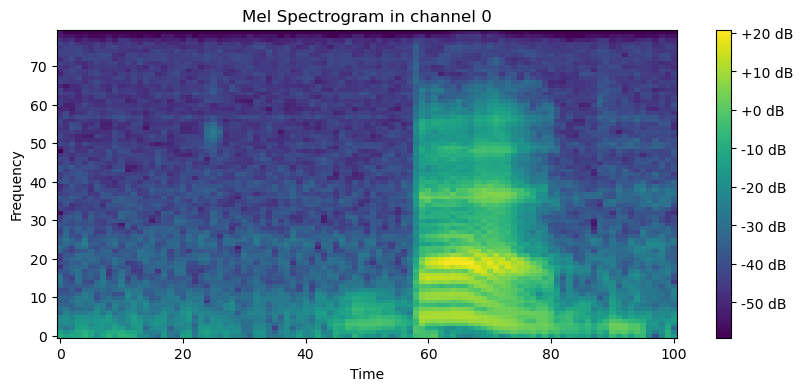

In [47]:
from lib.wavUtils import display_spectro_gram
display_spectro_gram(waveform=wavform)

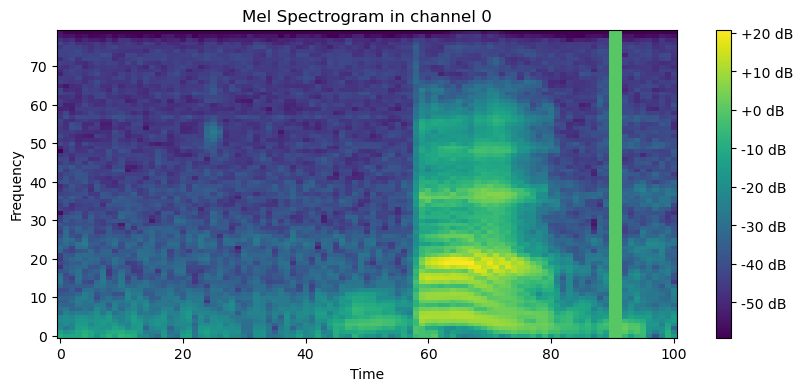

In [48]:
time_mask = a_transforms.TimeMasking(time_mask_param=3, p=.15)
wavform = time_mask(wavform)
display_spectro_gram(waveform=wavform)